# Dados de Vacinação - SUS

Esse projeto de Data Analytics tem como objetivo a coleta de dados, a limpeza dos dados e a exploração dos dados de vacinação divulgados pelo 'Open Data SUS' no link https://opendatasus.saude.gov.br/.

## Dicionário de Dados

In [1]:
'''
document_id: identificador do documento
paciente_id: identificador do vacinado
paciente_idade: idade do vacinado
paciente_dataNascimento: Data de nascimento do vacinado
paciente_enumSexoBiologico: sexo do vacinado (M - Masculino; F - Feminino)
paciente_racaCor_codigo: código da raça/cor do vacinado (1; 2; 3; 4; 99)
paciente_racaCor_valor: descrição da raça/cor do vacinado (1 - Branca; 2 - Preta; 3 - Parda; 4 - Amarela; 99 - Sem informação)
paciente_endereco_coIbgeMunicipio: código IBGE do município de endereço do vacinado
paciente_endereco_coPais: código do país de endereço do vacinado
paciente_endereco_nmMunicipio: nome do município de endereço do vacinado
paciente_endereco_nmPais: nome do país de endereço do vacinado
paciente_endereco_uf: sigla da UF de endereço do vacinado
paciente_endereco_cep: 5 dígitos para anonimizado e 7 dígitos para identificado
paciente_nacionalidade_enumNacionalidade: Nacionalidade do vacinado
estabelecimento_valor: código do CNES do estabelecimento que realizou a vacinação
estabelecimento_razaosocial: nome/razão social do estabelecimento
estabelecimento_noFantasia: nome fantasia do estabelecimento
estabelecimento_municipio_codigo: código do município do estabelecimento
estabelecimento_municipio_nome: nome do município do estabelecimento
estabelecimento_uf: sigla da UF do estabelecimento
vacina_grupo_atendimento_code: código do grupo de atendimento ao qual pertence o vacinado
vacina_grupo_atendimento_nome: nome do grupo de atendimento ao qual pertence o vacinado
vacina_categoria_code: código da categoria
vacina_categoria_nome: descrição da categoria
vacina_lote: número do lote da vacina
vacina_fabricante_nome: nome do fabricante/fornecedor
vacina_fabricante_referencia: CNPJ do fabricante/fornecedor
vacina_dataAplicacao: data de aplicação da vacina
vacina_descricao_dose: descrição da dose
vacina_codigo: código da vacina
vacina_nome: nome da vacina/produto
sistema origem: nome do sistema de origem
'''

'\ndocument_id: identificador do documento\npaciente_id: identificador do vacinado\npaciente_idade: idade do vacinado\npaciente_dataNascimento: Data de nascimento do vacinado\npaciente_enumSexoBiologico: sexo do vacinado (M - Masculino; F - Feminino)\npaciente_racaCor_codigo: código da raça/cor do vacinado (1; 2; 3; 4; 99)\npaciente_racaCor_valor: descrição da raça/cor do vacinado (1 - Branca; 2 - Preta; 3 - Parda; 4 - Amarela; 99 - Sem informação)\npaciente_endereco_coIbgeMunicipio: código IBGE do município de endereço do vacinado\npaciente_endereco_coPais: código do país de endereço do vacinado\npaciente_endereco_nmMunicipio: nome do município de endereço do vacinado\npaciente_endereco_nmPais: nome do país de endereço do vacinado\npaciente_endereco_uf: sigla da UF de endereço do vacinado\npaciente_endereco_cep: 5 dígitos para anonimizado e 7 dígitos para identificado\npaciente_nacionalidade_enumNacionalidade: Nacionalidade do vacinado\nestabelecimento_valor: código do CNES do estabel

# Análise Exploratória de Dados

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Estimativa da população segundo IBGE no link - 'https://sidra.ibge.gov.br/tabela/6579' para determinar estado de estudo.

In [3]:
populacao = pd.read_csv('populacao_estados_ibge.csv', sep=';')
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Cód.                           28 non-null     int64 
 1   Brasil e Unidade da Federação  28 non-null     object
 2   2021                           28 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 800.0+ bytes


In [4]:
populacao.rename(columns={'Cód' : 'Cod','Brasil e Unidade da Federação' : 'Estado', '2021' : 'Populacao'}, inplace=True)

<AxesSubplot:xlabel='Estado'>

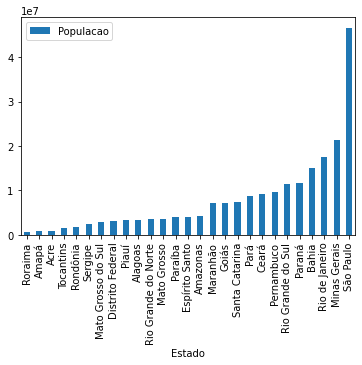

In [5]:
populacao[populacao['Estado'] != 'Brasil'].sort_values('Populacao').plot(kind='bar', x='Estado', y='Populacao')

In [6]:
populacao[populacao['Estado'] == 'Roraima']

,Cód.,Estado,Populacao
4,14,Roraima,652713


Escolhi o estado de Roraima por possuir a menor população e provavelmente o menor dataset no portal do Open Data SUS.

In [28]:
# opção de acesso direto a url
# url = 'https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-09-30/uf%3DRO/part-00000-40c13256-c916-44a6-8b22-66de465ae610.c000.csv'

dados = pd.read_csv('dados_vacinacao_Roraima.csv', sep=';')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699414 entries, 0 to 1699413
Data columns (total 34 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            int64  
 3   paciente_datanascimento                   object 
 4   paciente_enumsexobiologico                object 
 5   paciente_racacor_codigo                   int64  
 6   paciente_racacor_valor                    object 
 7   paciente_endereco_coibgemunicipio         float64
 8   paciente_endereco_copais                  float64
 9   paciente_endereco_nmmunicipio             object 
 10  paciente_endereco_nmpais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     float64
 13  paciente_nacionalidade_enumnacionalidade  object 
 14  es

In [8]:
dados.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_datanascimento', 'paciente_enumsexobiologico',
       'paciente_racacor_codigo', 'paciente_racacor_valor',
       'paciente_endereco_coibgemunicipio', 'paciente_endereco_copais',
       'paciente_endereco_nmmunicipio', 'paciente_endereco_nmpais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumnacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaosocial', 'estalecimento_nofantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoatendimento_codigo',
       'vacina_grupoatendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataaplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem', 'data_importacao_rnds', 'id_sistema_origem'],
      

## Pacientes

In [9]:
pacientes = [
    'paciente_id', 'paciente_idade',
       'paciente_datanascimento', 'paciente_enumsexobiologico',
       'paciente_racacor_codigo', 'paciente_racacor_valor',
       'paciente_endereco_coibgemunicipio', 'paciente_endereco_copais',
       'paciente_endereco_nmmunicipio', 'paciente_endereco_nmpais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumnacionalidade',
]

dados[pacientes].head()

,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade
0,79fb500910ba184f757d1894f06d2f47d201117e30801a...,24,1997-03-05,F,3,PARDA,110037.0,10.0,ALTO ALEGRE DOS PARECIS,BRASIL,RO,76952.0,B
1,55919244404512426044f7688a53a98b910b0e9549bfe5...,61,1960-04-02,M,1,BRANCA,110020.0,10.0,PORTO VELHO,BRASIL,RO,76841.0,B
2,b9978a285b48b229625cc9a77d4318afa72aacbb794bc7...,73,1947-11-28,F,3,PARDA,110013.0,10.0,MACHADINHO D'OESTE,BRASIL,RO,76868.0,B
3,fa0e6c294c6505a104dd79924b1e670e36d3c431715505...,65,1955-09-30,F,2,PRETA,110010.0,10.0,GUAJARA-MIRIM,BRASIL,RO,76850.0,B
4,8dc17335749e9063789b515a4b5e8c06e5552f1a4ab829...,66,1955-01-16,M,1,BRANCA,110009.0,10.0,ESPIGAO D'OESTE,BRASIL,RO,76974.0,B


## Vacina

In [10]:
vacinas = [ 
    'vacina_grupoatendimento_codigo',
       'vacina_grupoatendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataaplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome'
]

dados[vacinas].head()

,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome
0,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,210112,MINISTERIO DA SAUDE,Organization/00394544000851,2021-08-12,1ª Dose,89,Covid-19-AstraZeneca
1,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,210089,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-03,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan
2,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210052A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-31,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan
3,107,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-12,1ª Dose,85,Vacina Covid-19 - Covishield
4,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210110,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-09,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan


In [11]:
dados.groupby('vacina_descricao_dose')['paciente_id'].count()

vacina_descricao_dose
1ª Dose                 1123153
1ª Dose Revacinação          92
2ª Dose                  541467
3ª Dose                     157
Dose                      30855
Dose Adicional              349
Reforço                    3341
Name: paciente_id, dtype: int64

In [12]:
dados.vacina_descricao_dose.unique()

array(['1ª\xa0Dose', '2ª\xa0Dose', 'Dose\xa0', 'Dose\xa0Adicional\xa0',
       'Reforço\xa0', '3ª\xa0Dose', '1ª\xa0Dose\xa0Revacinação\xa0'],
      dtype=object)

In [29]:
dados.vacina_descricao_dose = dados.vacina_descricao_dose.apply(lambda x: x.replace('\xa0', ' '))


In [30]:
dados.vacina_descricao_dose.unique()

array(['1ª Dose', '2ª Dose', 'Dose ', 'Dose Adicional ', 'Reforço ',
       '3ª Dose', '1ª Dose Revacinação '], dtype=object)

In [ ]:
print('taxa de vacinados em função da estimativa do IBGE: ' + 
    str(
        (len(dados[(dados.vacina_descricao_dose == '1ª Dose') | 
        (dados.vacina_descricao_dose == '1ª Dose Revacinação')])
        / (populacao[populacao['Estado'] == 'Roraima'].Populacao)))
)

taxa de vacinados em função da estimativa do IBGE: 4    0.0
Name: Populacao, dtype: float64


In [ ]:
dados[(dados.vacina_descricao_dose == '1ª Dose') | 
        (dados.vacina_descricao_dose == '1ª Dose Revacinação')]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
